# Train a logistic regression and gradient booster on 4 species

Friday, May 18, 2018

In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
import os
import sys

#Store the relative and absolute path to the home directory of the project
project_directory = '../..'
project_path = os.path.abspath(os.path.join(project_directory))

#Add the project path to the system path if necessesary, to be able to load modules from subdirectories
if project_path not in sys.path:
    sys.path.append(project_path)

In [4]:
import src.image_manager as im
import src.model_eval as meval

## Load the features dataframes and append one species to the 3 species

In [5]:
features_3species_path = os.path.join(project_path, 'data', 'features_3species_20180514.csv')
features_2species_path = os.path.join(project_path, 'data', 'features_alnus_thuja.csv')

In [7]:
acer_picea_platanus_df = im.load_df(features_3species_path)
alnus_thuja_df = im.load_df(features_2species_path)

In [8]:
acer_picea_platanus_df.head()

,p_hash,filename,folder,incv3_out_0,incv3_out_1,incv3_out_2,incv3_out_3,incv3_out_4,incv3_out_5,incv3_out_6,...,incv3_out_2038,incv3_out_2039,incv3_out_2040,incv3_out_2041,incv3_out_2042,incv3_out_2043,incv3_out_2044,incv3_out_2045,incv3_out_2046,incv3_out_2047
0,9bb759cb29b01a25,image_bigleaf_maple_57.png,acer_macrophyllum,0.180042,0.057599,0.632024,0.021612,0.297033,0.011966,0.903157,...,0.360490,0.009282,0.055258,0.110056,0.058888,0.201237,0.198077,1.394304,0.155102,0.000000
1,99c20b3b74d53de0,image_bigleaf_maple_43.png,acer_macrophyllum,0.667066,0.249269,0.074132,0.177577,0.520580,0.167225,0.233005,...,1.446164,0.920353,0.823285,0.617185,0.121126,0.065866,0.876259,0.226926,0.274808,0.000000
2,a1e1e0d4e646e765,image_big_leaf_maple_bark_48.png,acer_macrophyllum,0.159188,0.011783,0.187351,0.211521,0.466182,0.387081,0.217815,...,1.198391,0.460702,0.157247,0.267633,0.006349,0.466702,0.641492,1.066418,0.145887,0.223863
3,abee94c19cb28b0e,image_acer_macrophylum_tree_49.png,acer_macrophyllum,0.658278,0.010192,0.344359,0.192652,0.342696,0.362848,0.562928,...,0.257585,0.077631,0.057183,0.411228,0.417154,0.048589,0.421282,0.057896,0.325496,0.145896
4,d3c161631f2b4b4e,image_bigleaf_maple_94.png,acer_macrophyllum,0.056695,0.255299,0.407071,0.066481,0.000076,0.568202,0.362414,...,1.289151,0.578341,0.963826,0.028785,0.310883,0.001386,1.154405,0.034431,0.768076,0.217323


In [9]:
alnus_thuja_df.head()

,p_hash,filename,folder,incv3_out_0,incv3_out_1,incv3_out_2,incv3_out_3,incv3_out_4,incv3_out_5,incv3_out_6,...,incv3_out_2038,incv3_out_2039,incv3_out_2040,incv3_out_2041,incv3_out_2042,incv3_out_2043,incv3_out_2044,incv3_out_2045,incv3_out_2046,incv3_out_2047
1262,c5c3866ab4dc8637,image_western_red_cedar_tree_17.png,thuja_plicata,1.336279,0.011943,0.395570,0.218817,0.317935,0.056648,0.087848,...,0.433737,0.159791,0.323293,0.009519,0.028450,0.134239,0.136767,0.110591,0.925633,0.000594
1263,83955f6a27e8417c,image_western_red_cedar_27.png,thuja_plicata,0.043319,0.085838,0.346090,0.269240,0.104244,0.059988,0.322002,...,0.215635,0.038550,0.123750,0.001528,0.207110,0.146056,0.085234,0.053560,0.083258,0.380264
1264,d3d39896b086f45a,image_western_red_cedar_33.png,thuja_plicata,1.537653,0.012991,0.189000,0.226903,0.465502,0.050164,0.166596,...,0.508620,0.233280,0.289102,0.243015,0.178973,0.020320,0.253384,0.242000,0.159114,0.119313
1265,8d889a9666a9d99b,image_thuja_plicata_branches_58.png,thuja_plicata,0.777048,0.043122,0.167806,0.864698,0.690728,0.504618,0.055242,...,0.283768,0.297945,0.192668,0.231448,0.173066,0.011833,0.944232,0.390534,0.715745,0.000000
1266,9d00e21bd27c4fb5,image_thuja_plicata_cones_58.png,thuja_plicata,0.117833,0.227984,0.097914,0.286688,0.123003,0.693201,0.113581,...,0.804989,0.391352,0.548050,0.849486,0.280309,0.712661,0.956842,0.001279,0.351022,0.132506


In [16]:
features_4species_df = acer_picea_platanus_df.append(alnus_thuja_df[alnus_thuja_df['folder'] == 'thuja_plicata'])
features_4species_df.tail()

,p_hash,filename,folder,incv3_out_0,incv3_out_1,incv3_out_2,incv3_out_3,incv3_out_4,incv3_out_5,incv3_out_6,...,incv3_out_2038,incv3_out_2039,incv3_out_2040,incv3_out_2041,incv3_out_2042,incv3_out_2043,incv3_out_2044,incv3_out_2045,incv3_out_2046,incv3_out_2047
1832,e36898c66d399cb4,image_thuja_plicata_branches_96.png,thuja_plicata,0.083918,0.166168,0.558727,0.027537,0.054673,0.170166,0.166989,...,1.370445,0.303498,0.222401,0.019987,0.021358,0.235605,0.032119,0.538935,0.037923,1.102876
1833,a9e4d68bd7632870,image_thuja_plicata_cones_82.png,thuja_plicata,0.340928,0.050327,0.118958,0.220579,0.010450,0.091026,0.316154,...,0.338676,0.028837,0.201438,0.922495,0.369425,0.020133,0.139394,0.000000,0.111569,0.724462
1834,d79ae0359f48835a,image_thuja_plicata_branches_82.png,thuja_plicata,0.650036,0.399849,0.566335,0.157019,0.792458,0.424557,0.438763,...,0.641063,0.229398,0.694067,0.553304,0.000000,0.218311,1.626439,0.020453,0.323357,0.070934
1835,a6a6f57594f284d0,image_western_red_cedar_tree_32.png,thuja_plicata,0.258416,0.010987,0.227817,0.598694,0.346953,0.114962,0.037960,...,0.220482,0.334772,0.886903,0.891988,0.353683,0.047528,0.631834,0.000000,0.044669,0.544044
1836,abd14c341baf47c2,image_western_red_cedar_tree_26.png,thuja_plicata,0.193753,0.006266,0.632279,0.065293,0.332640,0.151659,0.476420,...,0.128943,0.060852,0.000000,0.025686,0.029323,0.328659,0.144968,0.081436,0.771464,0.158379


In [19]:
features_4species_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2214 entries, 0 to 1836
Columns: 2051 entries, p_hash to incv3_out_2047
dtypes: float64(2048), object(3)
memory usage: 34.7+ MB


In [17]:
len(alnus_thuja_df[alnus_thuja_df['folder'] == 'thuja_plicata'])

575

In [18]:
1639+575 #Check that the totals for the 4 species add up

2214

## Pull out features (X) and labels (y), and get a train-test split¶

In [20]:
X = features_4species_df.drop(['p_hash', 'filename', 'folder'], axis=1)
y = features_4species_df['folder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=987)

In [23]:
print(f'Train: {len(X_train)}, Test: {len(X_test)}')

Train: 1771, Test: 443


In [24]:
y_train.value_counts()

picea_sitchensis       462
thuja_plicata          458
acer_macrophyllum      430
platanus_acerifolia    421
Name: folder, dtype: int64

In [25]:
y_test.value_counts()

platanus_acerifolia    120
thuja_plicata          117
picea_sitchensis       110
acer_macrophyllum       96
Name: folder, dtype: int64

In [29]:
np.log(4) #Baseline for log loss

1.3862943611198906

## Try Ridge Logistic Regression with same C as before

In [31]:
log_model = LogisticRegression(multi_class='multinomial', class_weight='balanced', solver='sag', C=0.001, max_iter=4000)

In [32]:
log_model.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=4000,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [33]:
logeval = meval.ModelEvaluator(log_model)
logeval.print_classifier_metrics(X_train, X_test, y_train, y_test)

Train log_loss: 0.8137722376015083, Test log_loss: 0.861858336866128
Train accuracy: 0.7594579333709769, Test accuracy: 0.6930022573363431


## Do a grid search to find the best C

In [35]:
param_grid = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1]}
gridsearch = GridSearchCV(estimator=log_model,
                          param_grid=param_grid, 
                          scoring=['neg_log_loss', 'accuracy'],
                          refit='neg_log_loss')

In [36]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=4000,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='sag', tol=0.0001, verbose=0,
          warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit='neg_log_loss',
       return_train_score='warn', scoring=['neg_log_loss', 'accuracy'],
       verbose=0)

In [37]:
gridsearch.best_params_

{'C': 0.1}

In [38]:
gridsearch.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=4000,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [151]:
logeval = meval.ModelEvaluator(gridsearch.best_estimator_)
logeval.print_classifier_metrics(X_train, X_test, y_train, y_test)

Train log_loss: 0.16499753162411077, Test log_loss: 0.6367373489170458
Train Matthews CC: 0.9842079810779679, Test Matthews CC: 0.6728841037394587
Train accuracy: 0.9881422924901185, Test accuracy: 0.7539503386004515
Train top_2_accuracy: 0.9983060417843026, Test top_2_accuracy: 0.9300225733634312
Train top_3_accuracy: 0.9994353472614342, Test top_3_accuracy: 0.9841986455981941


Whoa, nice! This beat my 3 species model... Hmm, maybe I should go back and see if I really found the best C for 3 species...

## Since the best C was at the edge of our range, let's do another search to see if we can do better

Figure out a logarithmic scale of parameters to use

In [42]:
10**(1/3)

2.154434690031884

In [44]:
[2.154434690031884**x for x in range(4)]

[1.0, 2.154434690031884, 4.641588833612779, 10.000000000000002]

In [49]:
np.sqrt(10)

3.1622776601683795

In [52]:
[3.16**x for x in range(5)]

[1.0, 3.16, 9.985600000000002, 31.554496000000004, 99.71220736000002]

In [56]:
[3**x for x in range(-2,3)]

[0.1111111111111111, 0.3333333333333333, 1, 3, 9]

In [57]:
param_grid = {'C': [0.03, 0.1, 0.3, 1, 10]}
gridsearch = GridSearchCV(estimator=log_model,
                          param_grid=param_grid, 
                          scoring=['neg_log_loss', 'accuracy'],
                          refit='neg_log_loss')

In [58]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=4000,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='sag', tol=0.0001, verbose=0,
          warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.03, 0.1, 0.3, 1, 10]}, pre_dispatch='2*n_jobs',
       refit='neg_log_loss', return_train_score='warn',
       scoring=['neg_log_loss', 'accuracy'], verbose=0)

In [59]:
gridsearch.best_params_

{'C': 0.1}

Ok, so we got the same value of C

In [60]:
log_model

LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=4000,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [61]:
log_model = gridsearch.best_estimator_
log_model

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=4000,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [63]:
logeval.confusion_df(X_test, y_test)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia,Predicted thuja_plicata
Actual acer_macrophyllum,68,4,14,10
Actual picea_sitchensis,5,89,1,15
Actual platanus_acerifolia,27,2,87,4
Actual thuja_plicata,9,16,2,90


## Let's try Lasso Logistic Regression

In [64]:
llog_model = LogisticRegression(penalty='l1', multi_class='multinomial', solver='saga', C=0.1, max_iter=4000)

In [65]:
llog_model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
llogeval = meval.ModelEvaluator(llog_model)
llogeval.print_classifier_metrics(X_train, X_test, y_train, y_test)

Train log_loss: 0.5923158627730702, Test log_loss: 0.7438334342573347
Train accuracy: 0.8063241106719368, Test accuracy: 0.7065462753950339


In [67]:
param_grid = {'C': [0.01, 0.1, 1]}
gridsearch = GridSearchCV(estimator=llog_model,
                          param_grid=param_grid, 
                          scoring=['neg_log_loss', 'accuracy'],
                          refit='neg_log_loss')

In [68]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1]}, pre_dispatch='2*n_jobs',
       refit='neg_log_loss', return_train_score='warn',
       scoring=['neg_log_loss', 'accuracy'], verbose=0)

In [70]:
pd.DataFrame(gridsearch.cv_results_)

/Users/ndbs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ndbs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_neg_log_loss'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ndbs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ndbs/anaconda3/lib

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_neg_log_loss,mean_train_accuracy,mean_train_neg_log_loss,param_C,params,rank_test_accuracy,rank_test_neg_log_loss,...,split2_test_accuracy,split2_test_neg_log_loss,split2_train_accuracy,split2_train_neg_log_loss,std_fit_time,std_score_time,std_test_accuracy,std_test_neg_log_loss,std_train_accuracy,std_train_neg_log_loss
0,2.438513,0.006110,0.400339,-1.318793,0.399496,-1.316427,0.01,{'C': 0.01},3,3,...,0.419355,-1.321498,0.399323,-1.309506,0.261535,0.000128,0.013434,0.002502,0.005467,0.006403
1,22.105378,0.006597,0.706381,-0.760069,0.782036,-0.660905,0.1,{'C': 0.1},2,2,...,0.702886,-0.769943,0.789340,-0.644273,2.264667,0.000467,0.008929,0.007087,0.007943,0.012517
2,110.493191,0.006627,0.738566,-0.698227,0.994636,-0.125886,1,{'C': 1},1,1,...,0.723260,-0.736571,0.992386,-0.123835,11.152733,0.000974,0.015212,0.031465,0.002111,0.003890


In [71]:
gridsearch.best_params_

{'C': 1}

In [72]:
gridsearch.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [150]:
llogeval = meval.ModelEvaluator(gridsearch.best_estimator_)
llogeval.print_classifier_metrics(X_train, X_test, y_train, y_test)

Train log_loss: 0.11672207085325637, Test log_loss: 0.8140612610303455
Train Matthews CC: 0.991726429454576, Test Matthews CC: 0.6552315487644428
Train accuracy: 0.9937888198757764, Test accuracy: 0.7404063205417607
Train top_2_accuracy: 0.9994353472614342, Test top_2_accuracy: 0.9209932279909706
Train top_3_accuracy: 1.0, Test top_3_accuracy: 0.9864559819413092


In [76]:
llogeval = meval.ModelEvaluator(gridsearch.best_estimator_)
llogeval.confusion_df(X_test, y_test)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia,Predicted thuja_plicata
Actual acer_macrophyllum,68,5,13,10
Actual picea_sitchensis,6,88,3,13
Actual platanus_acerifolia,28,5,84,3
Actual thuja_plicata,9,17,3,88


### Let's try one more C value since our optimum was on the boundary of the grid

This took several minutes to train.

In [77]:
llog_model = LogisticRegression(penalty='l1', multi_class='multinomial', solver='saga', C=10, max_iter=4000)
llog_model.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
llogeval = meval.ModelEvaluator(llog_model)
llogeval.print_classifier_metrics(X_train, X_test, y_train, y_test)

Train log_loss: 0.012917768707346471, Test log_loss: 1.2342111171041998
Train accuracy: 1.0, Test accuracy: 0.7404063205417607


Ok, so the results on the test set don't improve at all -- instead, it just overfits even more badly to the training data. So the best model is still with `C=1`. (Haha check out the confusion matrix for the training set!)

In [80]:
llogeval.confusion_df(X_train, y_train)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia,Predicted thuja_plicata
Actual acer_macrophyllum,430,0,0,0
Actual picea_sitchensis,0,462,0,0
Actual platanus_acerifolia,0,0,421,0
Actual thuja_plicata,0,0,0,458


In [81]:
llogeval.confusion_df(X_test, y_test)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia,Predicted thuja_plicata
Actual acer_macrophyllum,67,5,14,10
Actual picea_sitchensis,6,88,4,12
Actual platanus_acerifolia,27,5,83,5
Actual thuja_plicata,9,16,2,90


In [83]:
llog_model = gridsearch.best_estimator_
llog_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
llogeval = meval.ModelEvaluator(llog_model)
llogeval.confusion_df(X_test, y_test)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia,Predicted thuja_plicata
Actual acer_macrophyllum,68,5,13,10
Actual picea_sitchensis,6,88,3,13
Actual platanus_acerifolia,28,5,84,3
Actual thuja_plicata,9,17,3,88


## All right, let's try a gradient booster

In [84]:
gb_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=200, subsample=0.5, max_depth=5)

In [85]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [145]:
gbeval = meval.ModelEvaluator(gb_model)
gbeval.print_classifier_metrics(X_train, X_test, y_train, y_test)

#Oops, I ran this with the grid-searched gradient booster below. Here are the actual results:
# Train log_loss: 0.38322303020846127, Test log_loss: 0.8374452604196712
# Train accuracy: 0.9949181253529079, Test accuracy: 0.7155756207674944

Train log_loss: 0.015764459543378188, Test log_loss: 0.6820746363234138
Train Matthews CC: 1.0, Test Matthews CC: 0.6495799886430822
Train accuracy: 1.0, Test accuracy: 0.7358916478555305


In [93]:
gbeval.confusion_df(X_train, y_train)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia,Predicted thuja_plicata
Actual acer_macrophyllum,426,0,3,1
Actual picea_sitchensis,1,458,1,2
Actual platanus_acerifolia,0,0,421,0
Actual thuja_plicata,0,0,1,457


In [94]:
gbeval.confusion_df(X_test, y_test)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia,Predicted thuja_plicata
Actual acer_macrophyllum,63,5,19,9
Actual picea_sitchensis,10,82,3,15
Actual platanus_acerifolia,20,7,88,5
Actual thuja_plicata,12,15,6,84


In [92]:
gb_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=250, subsample=0.5,
                                      max_features='auto', max_depth=3, verbose=1)

In [95]:
param_grid = {'max_depth': [3,5]}
gridsearch = GridSearchCV(estimator=gb_model,
                          param_grid=param_grid, 
                          scoring=['neg_log_loss', 'accuracy'],
                          refit='neg_log_loss')

In [96]:
gridsearch.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1         780.5685          18.4090            1.88m
         2         757.4512          16.6705            1.86m
         3         736.8959          13.9035            1.86m
         4         710.8617          13.3693            1.84m
         5         696.4100          14.5601            1.83m
         6         672.7634          12.7553            1.82m
         7         657.4217          11.3458            1.80m
         8         644.4418           9.6591            1.78m
         9         627.9220           8.1390            1.78m
        10         613.5458          10.2160            1.77m
        20         496.1119           6.4976            1.69m
        30         412.3542           1.6401            1.61m
        40         351.3220           1.4243            1.52m
        50         308.8417           0.6629            1.44m
        60         262.5091           0.9884            1.37m
       

         7         891.3268          16.6414            5.31m
         8         853.3852          20.0347            5.30m
         9         816.8657          15.9522            5.28m
        10         784.4059          13.4067            5.29m
        20         571.7202           8.2549            5.06m
        30         439.9990           3.3548            4.92m
        40         337.2258           1.7884            4.66m
        50         268.5472           2.3392            4.41m
        60         217.3930           0.9655            4.16m
        70         186.9230           0.8508            3.93m
        80         152.5029           0.3887            3.71m
        90         130.3362           0.4333            3.50m
       100         112.2138           0.2367            3.29m
       200          27.6714           0.0202            1.09m


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=0.5, verbose=1,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5]}, pre_dispatch='2*n_jobs',
       refit='neg_log_loss', return_train_score='warn',
       scoring=['neg_log_loss', 'accuracy'], verbose=0)

In [97]:
pd.DataFrame(gridsearch.cv_results_)

/Users/ndbs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ndbs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_neg_log_loss'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ndbs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/ndbs/anaconda3/lib

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_neg_log_loss,mean_train_accuracy,mean_train_neg_log_loss,param_max_depth,params,rank_test_accuracy,rank_test_neg_log_loss,...,split2_test_accuracy,split2_test_neg_log_loss,split2_train_accuracy,split2_train_neg_log_loss,std_fit_time,std_score_time,std_test_accuracy,std_test_neg_log_loss,std_train_accuracy,std_train_neg_log_loss
0,110.965634,0.046013,0.720497,-0.669828,1.0,-0.079818,3,{'max_depth': 3},2,2,...,0.709677,-0.678081,1.0,-0.077164,1.690712,0.002455,0.007838,0.005830,0.0,0.001976
1,212.421822,0.059945,0.721626,-0.657333,1.0,-0.008315,5,{'max_depth': 5},1,1,...,0.701188,-0.689530,1.0,-0.008326,4.397540,0.002492,0.014527,0.024388,0.0,0.000290


In [104]:
3*(110+212)/60 #So the grid search took about 16 minutes

16.1

In [98]:
gridsearch.best_params_

{'max_depth': 5}

In [149]:
gb_model = gridsearch.best_estimator_
gbeval = meval.ModelEvaluator(gb_model)
gbeval.print_classifier_metrics(X_train, X_test, y_train, y_test)

Train log_loss: 0.015764459543378188, Test log_loss: 0.6820746363234138
Train Matthews CC: 1.0, Test Matthews CC: 0.6495799886430822
Train accuracy: 1.0, Test accuracy: 0.7358916478555305
Train top_2_accuracy: 1.0, Test top_2_accuracy: 0.9164785553047404
Train top_3_accuracy: 1.0, Test top_3_accuracy: 0.9729119638826185


In [100]:
gbeval.confusion_df(X_test, y_test)

,Predicted acer_macrophyllum,Predicted picea_sitchensis,Predicted platanus_acerifolia,Predicted thuja_plicata
Actual acer_macrophyllum,68,5,15,8
Actual picea_sitchensis,11,82,2,15
Actual platanus_acerifolia,23,5,89,3
Actual thuja_plicata,16,11,3,87


## Let's save the predicted probabilities and the confusion matrices for the test set

In [103]:
image_df = features_4species_df[['p_hash', 'filename', 'folder']]
train_images = image_df.loc[X_train.index,:]
train_images.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771 entries, 1803 to 1594
Data columns (total 3 columns):
p_hash      1771 non-null object
filename    1771 non-null object
folder      1771 non-null object
dtypes: object(3)
memory usage: 55.3+ KB


In [111]:
log_model.predict_proba(X_test)

array([[  1.69365345e-03,   9.96650446e-01,   7.37370626e-05,
          1.58216390e-03],
       [  1.73105106e-02,   9.71396215e-01,   2.18202895e-03,
          9.11124578e-03],
       [  1.14987302e-03,   2.05575511e-02,   5.43183111e-04,
          9.77749393e-01],
       ..., 
       [  4.07092777e-02,   8.65089419e-01,   8.97325404e-03,
          8.52280492e-02],
       [  1.68253268e-02,   9.76238427e-01,   5.19143100e-05,
          6.88433194e-03],
       [  4.84117465e-02,   5.19377875e-01,   7.98169142e-04,
          4.31412209e-01]])

In [113]:
image_df.loc[X_test.index,:].head()

,p_hash,filename,folder
3594,d016ef498d0ff843,image_picea_sitchensis_foliage_67.png,picea_sitchensis
4115,c6ed6df5404b5903,image_sitka_spruce_68.png,picea_sitchensis
1823,d51e3ded093a3514,image_thuja_plicata_foliage_27.png,thuja_plicata
3814,c4137fc4aab44be2,image_sitka_spruce_cones_2.png,picea_sitchensis
4653,c288376e033fb28f,image_platanus_acerifolia_leaves_21.png,platanus_acerifolia


In [119]:
non_feature_columns = ['p_hash', 'filename', 'folder']

def get_predictions(features_df, index_set, non_feature_columns, model, prefix):
    pred_columns = [prefix + '_' + species for species in model.classes_]
    
    image_df = features_df.loc[index_set, non_feature_columns]
    y_pred = model.predict_proba(features_df.drop(non_feature_columns, axis=1).loc[index_set,:])
    image_df[pred_columns] = pd.DataFrame(y_pred, index = image_df.index)
    
    return image_df

In [122]:
log_pred = get_predictions(features_4species_df, X_test.index, non_feature_columns, log_model, 'prob_logl2')
log_pred.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia,prob_logl2_thuja_plicata
3594,d016ef498d0ff843,image_picea_sitchensis_foliage_67.png,picea_sitchensis,0.001694,0.996650,0.000074,0.001582
4115,c6ed6df5404b5903,image_sitka_spruce_68.png,picea_sitchensis,0.017311,0.971396,0.002182,0.009111
1823,d51e3ded093a3514,image_thuja_plicata_foliage_27.png,thuja_plicata,0.001150,0.020558,0.000543,0.977749
3814,c4137fc4aab44be2,image_sitka_spruce_cones_2.png,picea_sitchensis,0.000639,0.895768,0.000807,0.102785
4653,c288376e033fb28f,image_platanus_acerifolia_leaves_21.png,platanus_acerifolia,0.676151,0.000009,0.322795,0.001045


In [123]:
llog_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=4000, multi_class='multinomial',
          n_jobs=1, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [124]:
llog_pred = get_predictions(features_4species_df, X_test.index, non_feature_columns, llog_model, 'prob_logl1')
llog_pred.head()

,p_hash,filename,folder,prob_logl1_acer_macrophyllum,prob_logl1_picea_sitchensis,prob_logl1_platanus_acerifolia,prob_logl1_thuja_plicata
3594,d016ef498d0ff843,image_picea_sitchensis_foliage_67.png,picea_sitchensis,0.000636,9.992721e-01,0.000008,0.000083
4115,c6ed6df5404b5903,image_sitka_spruce_68.png,picea_sitchensis,0.007013,9.132217e-01,0.000963,0.078803
1823,d51e3ded093a3514,image_thuja_plicata_foliage_27.png,thuja_plicata,0.000086,2.469653e-02,0.000568,0.974650
3814,c4137fc4aab44be2,image_sitka_spruce_cones_2.png,picea_sitchensis,0.000026,9.877697e-01,0.000041,0.012163
4653,c288376e033fb28f,image_platanus_acerifolia_leaves_21.png,platanus_acerifolia,0.614655,3.186668e-07,0.385046,0.000298


In [125]:
gb_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=None, subsample=0.5, verbose=1,
              warm_start=False)

In [126]:
#lr05: learning_rate=0.05
#d5: max_depth=5
#n250: n_estimators=250
gb_pred = get_predictions(features_4species_df, X_test.index, non_feature_columns, gb_model, 'prob_gb_lr05_d5_n250')
gb_pred.head()

,p_hash,filename,folder,prob_gb_lr05_d5_n250_acer_macrophyllum,prob_gb_lr05_d5_n250_picea_sitchensis,prob_gb_lr05_d5_n250_platanus_acerifolia,prob_gb_lr05_d5_n250_thuja_plicata
3594,d016ef498d0ff843,image_picea_sitchensis_foliage_67.png,picea_sitchensis,0.003032,0.994430,0.000924,0.001614
4115,c6ed6df5404b5903,image_sitka_spruce_68.png,picea_sitchensis,0.008656,0.966893,0.015047,0.009404
1823,d51e3ded093a3514,image_thuja_plicata_foliage_27.png,thuja_plicata,0.023806,0.288250,0.007396,0.680548
3814,c4137fc4aab44be2,image_sitka_spruce_cones_2.png,picea_sitchensis,0.029675,0.841354,0.022465,0.106506
4653,c288376e033fb28f,image_platanus_acerifolia_leaves_21.png,platanus_acerifolia,0.945625,0.000842,0.052243,0.001291


In [129]:
test_images = log_pred.merge(llog_pred, on=non_feature_columns).merge(gb_pred, on=non_feature_columns)
test_images.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia,prob_logl2_thuja_plicata,prob_logl1_acer_macrophyllum,prob_logl1_picea_sitchensis,prob_logl1_platanus_acerifolia,prob_logl1_thuja_plicata,prob_gb_lr05_d5_n250_acer_macrophyllum,prob_gb_lr05_d5_n250_picea_sitchensis,prob_gb_lr05_d5_n250_platanus_acerifolia,prob_gb_lr05_d5_n250_thuja_plicata
0,d016ef498d0ff843,image_picea_sitchensis_foliage_67.png,picea_sitchensis,0.001694,0.996650,0.000074,0.001582,0.000636,9.992721e-01,0.000008,0.000083,0.003032,0.994430,0.000924,0.001614
1,c6ed6df5404b5903,image_sitka_spruce_68.png,picea_sitchensis,0.017311,0.971396,0.002182,0.009111,0.007013,9.132217e-01,0.000963,0.078803,0.008656,0.966893,0.015047,0.009404
2,d51e3ded093a3514,image_thuja_plicata_foliage_27.png,thuja_plicata,0.001150,0.020558,0.000543,0.977749,0.000086,2.469653e-02,0.000568,0.974650,0.023806,0.288250,0.007396,0.680548
3,c4137fc4aab44be2,image_sitka_spruce_cones_2.png,picea_sitchensis,0.000639,0.895768,0.000807,0.102785,0.000026,9.877697e-01,0.000041,0.012163,0.029675,0.841354,0.022465,0.106506
4,c288376e033fb28f,image_platanus_acerifolia_leaves_21.png,platanus_acerifolia,0.676151,0.000009,0.322795,0.001045,0.614655,3.186668e-07,0.385046,0.000298,0.945625,0.000842,0.052243,0.001291


In [130]:
test_images_path = os.path.join(project_path, 'data', 'predictions_4species_test_20180520.csv')
im.export_df(test_images, test_images_path)

In [131]:
!ls -l ../../data

total 391408
-rw-r--r--  1 ndbs  staff  64733256 May 15 22:05 features_3species_20180514.csv
-rw-r--r--  1 ndbs  staff  45107453 May 18 21:11 features_alnus_thuja.csv
-rw-r--r--  1 ndbs  staff  45553703 May 18 21:25 features_cedrus_pseudotsuga.csv
-rw-r--r--  1 ndbs  staff     25651 Feb  7 16:01 gb_confusion.png
-rw-r--r--  1 ndbs  staff   3105147 Feb  1 16:44 gb_model_jan30.pkl
-rw-r--r--  1 ndbs  staff    706729 May 18 20:15 image_log.csv
-rw-r--r--  1 ndbs  staff    488281 Feb  5 00:30 image_log_20180204.csv
-rw-r--r--  1 ndbs  staff    711665 Feb  5 22:03 image_log_20180205.csv
-rw-r--r--  1 ndbs  staff    707031 May 11 18:34 image_log_20180511.csv
-rw-r--r--  1 ndbs  staff       611 May 18 20:15 image_syncs.csv
-rw-r--r--  1 ndbs  staff       141 Feb  4 22:51 image_syncs_20180204.csv
-rw-r--r--  1 ndbs  staff       427 Feb  5 22:03 image_syncs_20180205.csv
-rw-r--r--  1 ndbs  staff       324 May 11 18:34 image_syncs_20180511.csv
-rw-r--r--  1 ndbs  staff     82211 May 18 16:51 pre

### Save the confusion matrices for the test set

In [134]:
confusion_df_path = os.path.join(project_path, 'data', 'confusion_4species_logl2_20180520.csv')
logeval.confusion_df(X_test, y_test).to_csv(confusion_df_path)

In [138]:
confusion_df_path = os.path.join(project_path, 'data', 'confusion_4species_logl1_20180520.csv')
llogeval.confusion_df(X_test, y_test).to_csv(confusion_df_path)

In [139]:
confusion_df_path = os.path.join(project_path, 'data', 'confusion_4species_gb_lr05_d5_n250_20180520.csv')
gbeval.confusion_df(X_test, y_test).to_csv(confusion_df_path)

In [140]:
!ls -l ../../data

total 391432
-rw-r--r--  1 ndbs  staff       249 May 20 14:30 confusion_4species_gb_lr05_d5_n250_20180520.csv
-rw-r--r--  1 ndbs  staff       248 May 20 14:29 confusion_4species_logl1_20180520.csv
-rw-r--r--  1 ndbs  staff       248 May 20 14:24 confusion_4species_logl2_20180520.csv
-rw-r--r--  1 ndbs  staff  64733256 May 15 22:05 features_3species_20180514.csv
-rw-r--r--  1 ndbs  staff  45107453 May 18 21:11 features_alnus_thuja.csv
-rw-r--r--  1 ndbs  staff  45553703 May 18 21:25 features_cedrus_pseudotsuga.csv
-rw-r--r--  1 ndbs  staff     25651 Feb  7 16:01 gb_confusion.png
-rw-r--r--  1 ndbs  staff   3105147 Feb  1 16:44 gb_model_jan30.pkl
-rw-r--r--  1 ndbs  staff    706729 May 18 20:15 image_log.csv
-rw-r--r--  1 ndbs  staff    488281 Feb  5 00:30 image_log_20180204.csv
-rw-r--r--  1 ndbs  staff    711665 Feb  5 22:03 image_log_20180205.csv
-rw-r--r--  1 ndbs  staff    707031 May 11 18:34 image_log_20180511.csv
-rw-r--r--  1 ndbs  staff       611 May 18 20:15 image_syncs.csv
-rw

## Ok, might as well save the predicted probabilities for the training set too

In [141]:
log_pred = get_predictions(features_4species_df, X_train.index, non_feature_columns, log_model, 'prob_logl2')
llog_pred = get_predictions(features_4species_df, X_train.index, non_feature_columns, llog_model, 'prob_logl1')
gb_pred = get_predictions(features_4species_df, X_train.index, non_feature_columns, gb_model, 'prob_gb_lr05_d5_n250')

train_images = log_pred.merge(llog_pred, on=non_feature_columns).merge(gb_pred, on=non_feature_columns)
train_images.head()

,p_hash,filename,folder,prob_logl2_acer_macrophyllum,prob_logl2_picea_sitchensis,prob_logl2_platanus_acerifolia,prob_logl2_thuja_plicata,prob_logl1_acer_macrophyllum,prob_logl1_picea_sitchensis,prob_logl1_platanus_acerifolia,prob_logl1_thuja_plicata,prob_gb_lr05_d5_n250_acer_macrophyllum,prob_gb_lr05_d5_n250_picea_sitchensis,prob_gb_lr05_d5_n250_platanus_acerifolia,prob_gb_lr05_d5_n250_thuja_plicata
0,b5f0c24faf88da88,image_western_red_cedar_tree_25.png,thuja_plicata,0.058773,0.023097,0.003238,0.914892,0.031870,0.005574,0.000371,0.962185,0.009670,0.005551,0.002658,0.982120
1,d1df22e5a9830f0b,image_sitka_spruce_cones_34.png,picea_sitchensis,0.007876,0.951916,0.000122,0.040086,0.001791,0.963277,0.000011,0.034920,0.002025,0.992441,0.001017,0.004517
2,e37e78b80974d047,image_platanus_acerifolia_bark_44.png,platanus_acerifolia,0.000110,0.000350,0.998636,0.000904,0.000011,0.000027,0.999952,0.000010,0.001969,0.002294,0.994799,0.000939
3,eaf91462ed15885e,image_platanus_acerifolia_in_winter_8.png,platanus_acerifolia,0.049685,0.013658,0.911503,0.025154,0.054382,0.011620,0.925156,0.008841,0.005343,0.001320,0.991771,0.001566
4,88ce0edfd6145371,image_bigleaf_maple_forest_99.png,acer_macrophyllum,0.727375,0.255973,0.000034,0.016617,0.840962,0.155056,0.000001,0.003980,0.970209,0.014938,0.002059,0.012794


In [142]:
train_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771 entries, 0 to 1770
Data columns (total 15 columns):
p_hash                                      1771 non-null object
filename                                    1771 non-null object
folder                                      1771 non-null object
prob_logl2_acer_macrophyllum                1771 non-null float64
prob_logl2_picea_sitchensis                 1771 non-null float64
prob_logl2_platanus_acerifolia              1771 non-null float64
prob_logl2_thuja_plicata                    1771 non-null float64
prob_logl1_acer_macrophyllum                1771 non-null float64
prob_logl1_picea_sitchensis                 1771 non-null float64
prob_logl1_platanus_acerifolia              1771 non-null float64
prob_logl1_thuja_plicata                    1771 non-null float64
prob_gb_lr05_d5_n250_acer_macrophyllum      1771 non-null float64
prob_gb_lr05_d5_n250_picea_sitchensis       1771 non-null float64
prob_gb_lr05_d5_n250_platanus_acerifol

In [143]:
train_images_path = os.path.join(project_path, 'data', 'predictions_4species_train_20180520.csv')
im.export_df(train_images, train_images_path)

In [144]:
!ls -l ../../data

total 392544
-rw-r--r--  1 ndbs  staff       249 May 20 14:30 confusion_4species_gb_lr05_d5_n250_20180520.csv
-rw-r--r--  1 ndbs  staff       248 May 20 14:29 confusion_4species_logl1_20180520.csv
-rw-r--r--  1 ndbs  staff       248 May 20 14:24 confusion_4species_logl2_20180520.csv
-rw-r--r--  1 ndbs  staff  64733256 May 15 22:05 features_3species_20180514.csv
-rw-r--r--  1 ndbs  staff  45107453 May 18 21:11 features_alnus_thuja.csv
-rw-r--r--  1 ndbs  staff  45553703 May 18 21:25 features_cedrus_pseudotsuga.csv
-rw-r--r--  1 ndbs  staff     25651 Feb  7 16:01 gb_confusion.png
-rw-r--r--  1 ndbs  staff   3105147 Feb  1 16:44 gb_model_jan30.pkl
-rw-r--r--  1 ndbs  staff    706729 May 18 20:15 image_log.csv
-rw-r--r--  1 ndbs  staff    488281 Feb  5 00:30 image_log_20180204.csv
-rw-r--r--  1 ndbs  staff    711665 Feb  5 22:03 image_log_20180205.csv
-rw-r--r--  1 ndbs  staff    707031 May 11 18:34 image_log_20180511.csv
-rw-r--r--  1 ndbs  staff       611 May 18 20:15 image_syncs.csv
-rw

## Create and save a nice confusion matrix

Monday, May 21, 2018

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
species = ['Maple', 'Spruce', 'Plane', 'Red-cedar']
confusion_df = logeval.confusion_df(X_test, y_test)

Confusion matrix, without normalization
[[68  4 14 10]
 [ 5 89  1 15]
 [27  2 87  4]
 [ 9 16  2 90]]


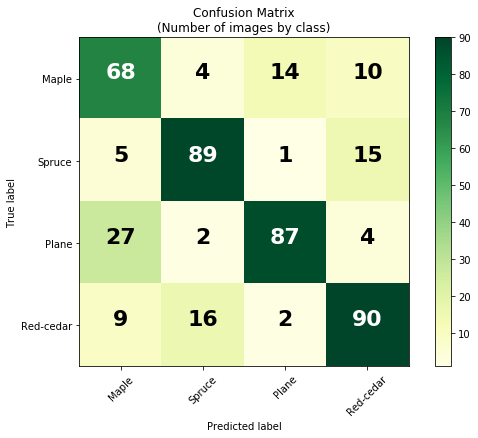

In [156]:
plt.figure(figsize=(8,6))
meval.plot_confusion_matrix(confusion_df.values, species, cmap='YlGn', colorbar=True)
plt.savefig(project_path + '/data/confusion_4species.png',bbox_inches="tight")
plt.show()